<a href="https://colab.research.google.com/github/guidobavosacastelao/Curso_Python_2022/blob/main/Cuaderno_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

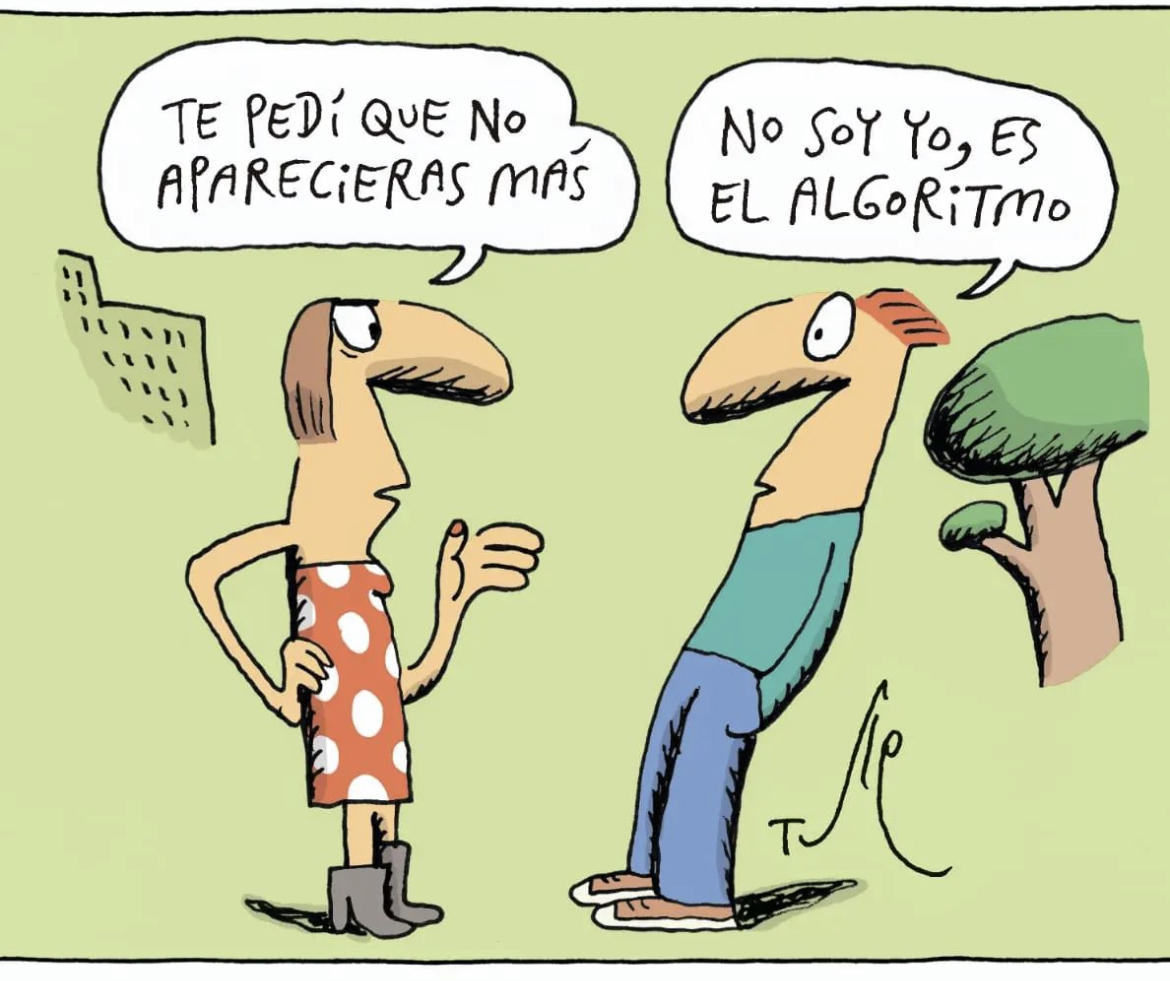

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype
from google.colab import files

# Think simple and learn the fundamentals first.

URL del dataset: 
https://www.kaggle.com/datasets/shubh0799/churn-modelling

In [ ]:
 files.upload() # Cargo el archivo

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df # inspecciono del Data Frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
print(df.shape) # El dataset contiene 10000 filas y 14 columnas.

(10000, 14)


Se espera que podamos pronosticar la rotación de clientes (es decir, Churn = 1) usando las otras 13 columnas. La columna Exited se llama la variable target o independiente. Las otras columnas se denominan características o variables dependientes.

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

El número de fila, el apellido y la identificación del cliente son características redundantes, por lo que podemos descartarlas. El id de los clientes o sus apellidos no tienen efecto en la rotación de clientes.

In [7]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True) # descartamos columnas que no nos sirven


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe() # Resumen de variables numéricas

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Encoding de variables categóricas

Un conjunto de datos típico contiene variables categóricas y numéricas. Una gran parte de los algoritmos de machine learning sólo aceptan variables numéricas. Por lo tanto, la codificación de variables categóricas es una tarea común de preprocesamiento.

Nuestro conjunto de datos contiene dos variables categóricas que son geografía y género. Revisemos los distintos valores en estas columnas.

In [10]:
df.Geography.unique() # reviso la variable Geography

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df.Gender.unique() # reviso la variable Genero

array(['Female', 'Male'], dtype=object)

Label Encoding ----> Relación Jerárquica

Para superar este problema, podemos usar un enfoque llamado One-hot encoding. Cada valor distinto se representa como una columna binaria. Si el valor en la columna de geografía es Francia, entonces solo la columna de Francia toma el valor 1. Las demás se convierten en cero.

In [12]:
geography = pd.get_dummies(df.Geography)

In [13]:
gender = pd.get_dummies(df.Gender)

In [14]:
df = pd.concat([df, geography, gender], axis=1)

In [15]:
df[["Geography","Gender","France","Germany","Spain","Female","Male"]].head() # One-hot encoding

,Geography,Gender,France,Germany,Spain,Female,Male
0,France,Female,1,0,0,1,0
1,Spain,Female,0,0,1,1,0
2,France,Female,1,0,0,1,0
3,France,Female,1,0,0,1,0
4,Spain,Female,0,0,1,1,0


## Exploratory Data Analysis

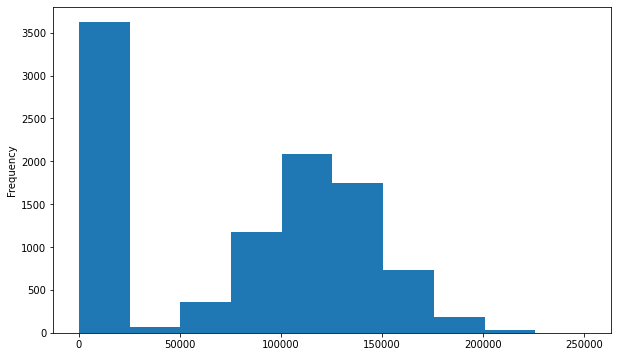

In [16]:
df.Balance.plot(kind="hist", figsize=(10,6)) # Histograma de los Saldos de Cuenta

Parece que muchos clientes tienen saldo cero. Podría ser mejor convertir esta columna a binaria, 0 para ningún saldo y 1 para saldo positivo.

In [17]:
df.Balance = np.where(df.Balance==0, 0, 1)
df.Balance

0       0
1       1
2       1
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: Balance, Length: 10000, dtype: int64

In [18]:
df.Balance.value_counts() # Un tercio de los clientes tienen saldo 0

1    6383
0    3617
Name: Balance, dtype: int64

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,1,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,1,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,1,1,1,1,79084.10,0,0,0,1,1,0


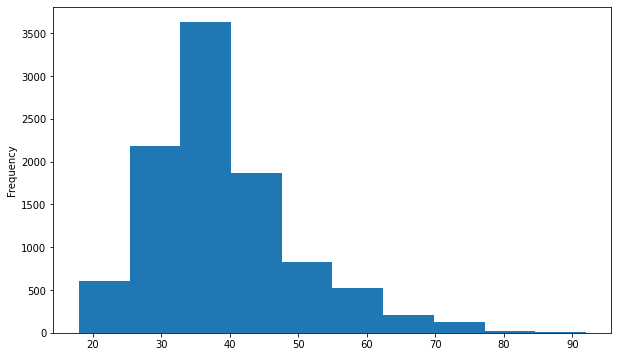

In [22]:
df.Age.plot(kind="hist", figsize=(10,6)) # Histograma de la Edad

## Scaling variables numéricas

- Los rangos de valores de las variables numéricas son muy diferentes. Los valores de edad son inferiores a $100$ mientras que los salarios estimados son superiores a $10$ mil.

- Si usamos estas características tal como están, el modelo podría dar más importancia a la columna con valores más altos. Por lo tanto, es mejor escalarlos al mismo rango

- Un enfoque común es el escalado min-max. Los valores más alto y más bajo se escalan a $1$ y $0$, respectivamente.
 Los que están en el medio se escalan en consecuencia.También hay opciones de escalado más avanzadas.El punto aquí es enfatizar la importancia de escalar las características.

- $ x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}} $

## Train-Test split

- Alimentamos el modelo con datos para que "aprenda" las relaciones entre las variables o la estructura dentro de los datos.

- Después de entrenar un modelo, el mismo debe probarse. Sin embargo, no es aceptable probar un modelo con los datos con los que se entrenó. Sería similar a hacer trampa. Un modelo podría simplemente memorizar todo en los datos y brindarle un 100% de precisión.

- Por lo tanto, antes de entrenar un modelo, es una práctica común reservar una parte de los datos para realizar pruebas. El rendimiento del modelo debe evaluarse utilizando los datos de prueba.


In [23]:
from sklearn.model_selection import train_test_split

- La X contiene las features y la y contiene la variable target. De forma predeterminada, el 25 % de todos los datos se reserva para testeos. Puede cambiar esta relación utilizando los parámetros test_size o train_size.

In [24]:
X = df.drop(["Exited","Geography","Gender"], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,1,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,1,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,1,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,1,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,1,2,1,0,92888.52,0,1,0,0,1


In [25]:
y = df["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X_train.shape

(7500, 13)

In [28]:
X_test.shape

(2500, 13)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler() # Genero el escalamiento
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

## Model training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
model = LogisticRegression() # Genero un modelo de Regresión Logística y se entrena (binary classification)
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
model 

LogisticRegression()

In [34]:
y_train_pred = model.predict(X_train)   # Se generan las predicciones
y_test_pred = model.predict(X_test)

In [35]:
print(accuracy_score(y_train, y_train_pred)) # Se evalúa en el conjunto de entrenamiento (Overfitting-AppropoUnderfitting)

0.7849333333333334


In [36]:
print(accuracy_score(y_test, y_test_pred)) # Se evalúa en el conjunto de testeo

0.7944


In [37]:
print(model.coef_, model.intercept_) # Parámetros del modelo 

[[-4.63845785e-03  4.48501109e-02 -1.49824144e-03  9.50979208e-04
  -7.11111734e-04 -1.97218615e-04 -1.37980805e-03 -1.22709776e-06
  -9.44182852e-04  1.19814242e-03 -3.95701228e-04  8.80216546e-04
  -1.02195821e-03]] [-0.00014174]


Otros algoritmos:

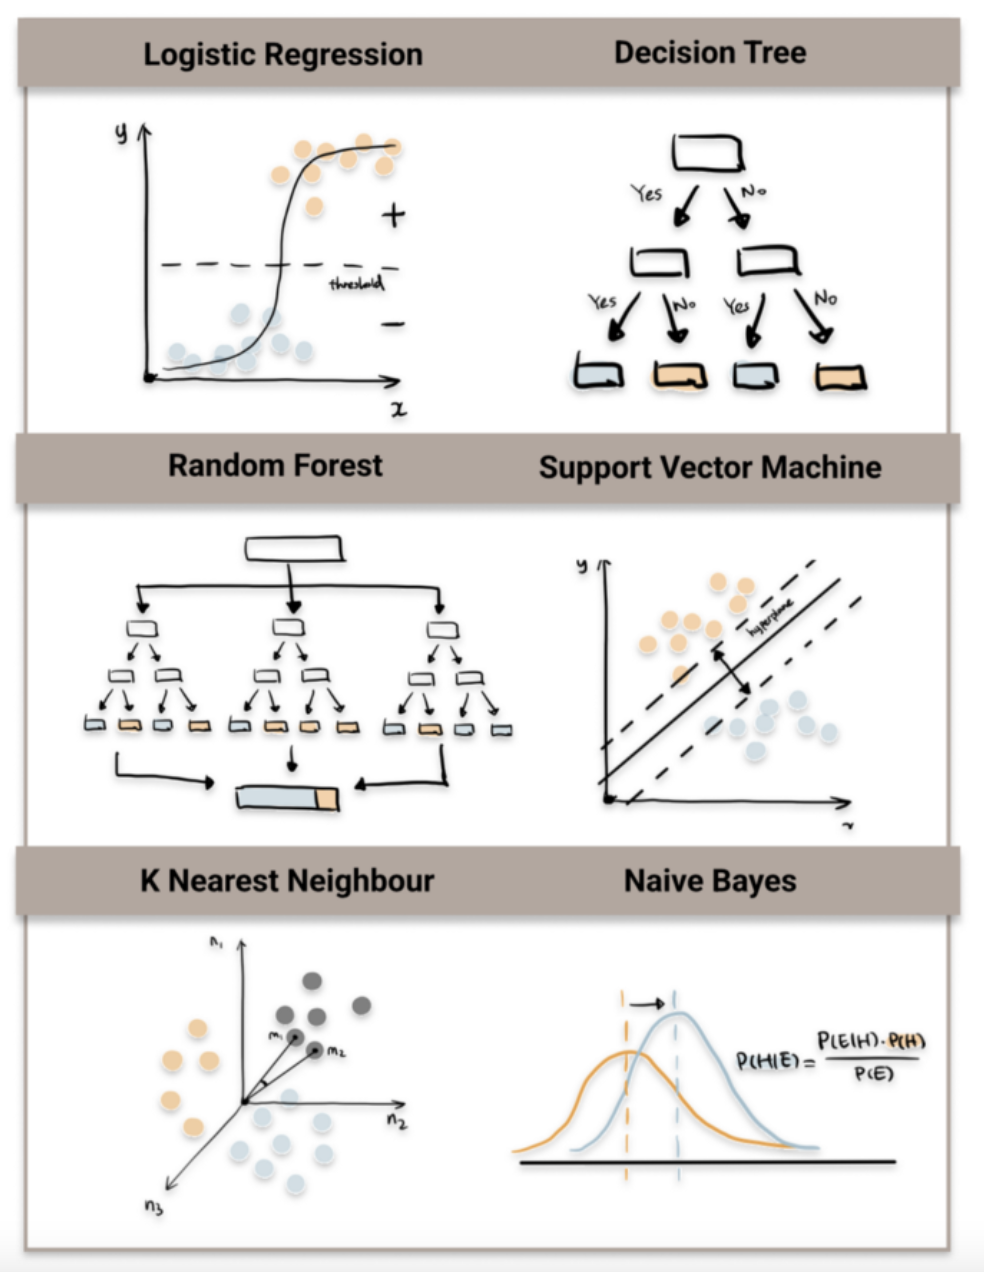